<a href="https://colab.research.google.com/github/fraanglen/AIML-PROJECT/blob/main/hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

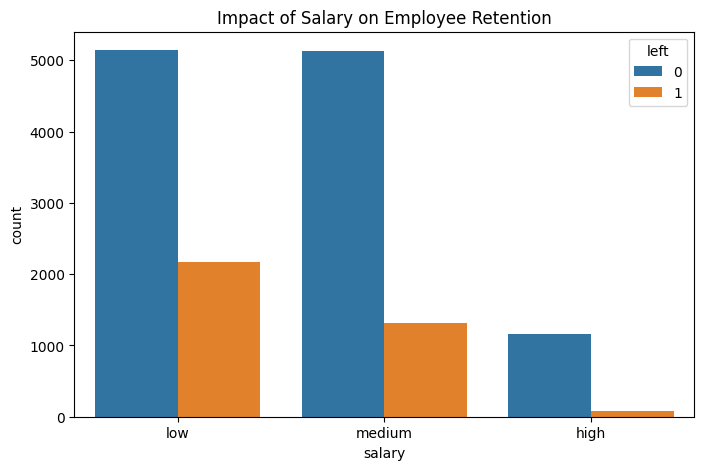

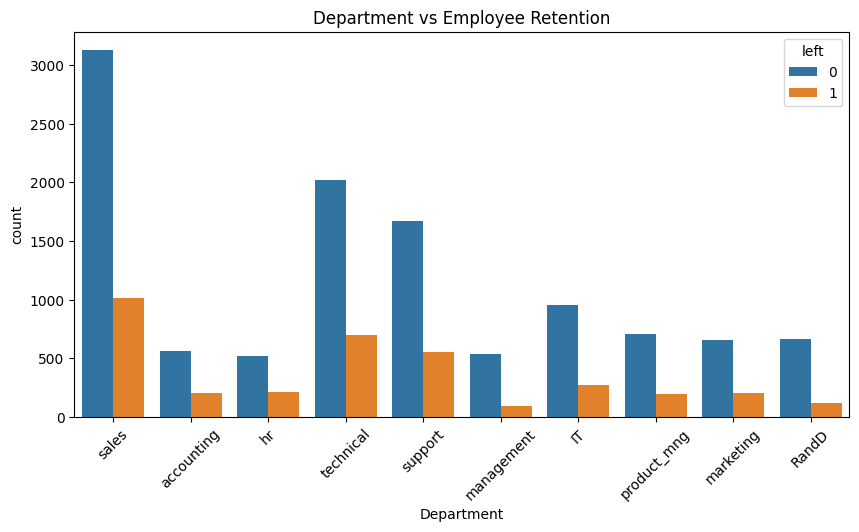

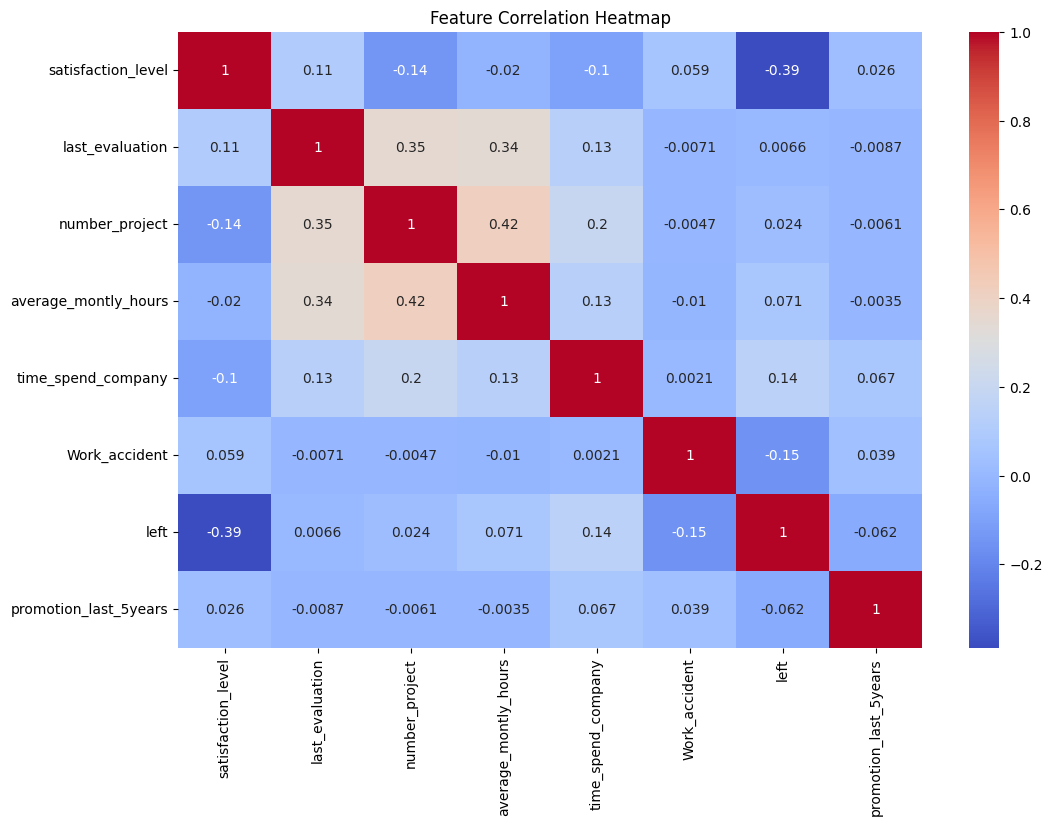

Accuracy: 0.7823333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.64      3000
weighted avg       0.76      0.78      0.76      3000


ROC AUC Score: 0.6243106169314704


In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Step 2: Load Dataset
# If uploaded to Colab, use the file picker
from google.colab import files
#uploaded = files.upload()  # Select HR_comma_sep.csv - Commented out to avoid repeated uploads

# Read the CSV file
df = pd.read_csv('HR_comma_sep.csv')

# Quick overview of dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Exploratory Data Analysis (EDA)

# 3.1: Impact of Salary on Retention
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='salary', hue='left')
plt.title('Impact of Salary on Employee Retention')
plt.show()

# 3.2: Impact of Department on Retention
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Department', hue='left') # Changed 'department' to 'Department'
plt.title('Department vs Employee Retention')
plt.xticks(rotation=45)
plt.show()

# Optional: Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') # Added numeric_only=True
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 4: Feature Selection for Logistic Regression
# Select features that likely affect retention
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'Work_accident', # Changed 'work_accident' to 'Work_accident'
            'promotion_last_5years', 'salary', 'Department'] # Changed 'department' to 'Department'

X = df[features]
y = df['left']  # 1 = left, 0 = stayed

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))